In [1]:
from fastai.vision import *

In [2]:
data_path = Path.home()/'programming/data/chrono24'
csv_path = data_path/'file_attribs_inference.csv'

In [3]:
df = pd.read_csv(csv_path)
df.head()

,name,dial_visibility,dial_visibility_p_0,dial_visibility_p_1,like,like_p_0,like_p_1
0,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.000024,0.999977,-1,-1,-1
1,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.002802,0.997198,-1,-1,-1
2,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.000682,0.999318,-1,-1,-1
3,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.067628,0.932372,-1,-1,-1
4,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.000840,0.999160,-1,-1,-1


In [4]:
total_img = df.shape[0]
total_img

1049197

In [56]:
visible, non_visible = df['dial_visibility'].value_counts()
visible, non_visible

(691557, 357640)

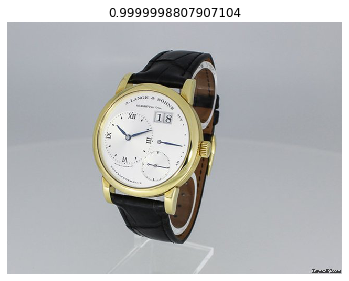

In [69]:
# shows images with visible dial and puts probability as title
idx = int(3e3)
df_visible = df[df['dial_visibility'] == 1]
name = data_path/df_visible.iloc[idx]['name']
pred = df_visible.iloc[idx]['dial_visibility_p_1']
img = open_image(name)
img.show(figsize=(6,6), title=str(pred))


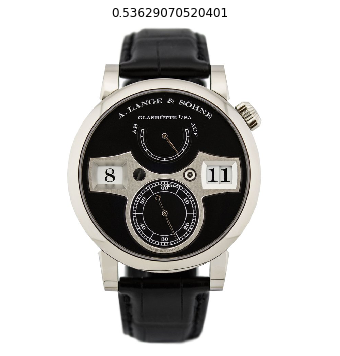

In [75]:
# shows images with invisible dial and puts probability as title
idx = int(3e3)
df_invisible = df[df['dial_visibility'] == 0]
name = data_path/df_invisible.iloc[idx]['name']
pred = df_invisible.iloc[idx]['dial_visibility_p_0']
img = open_image(name)
img.show(figsize=(6,6), title=str(pred))

In [92]:
df_most_uncertain = df_invisible[df_invisible['dial_visibility_p_0'] < 0.55]
df_most_uncertain.shape


(4807, 7)

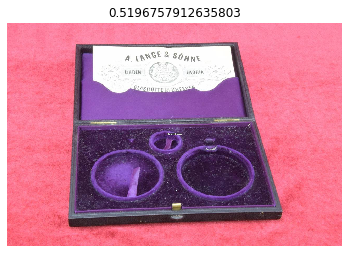

In [97]:
idx = int(4)
name = data_path/df_most_uncertain.iloc[idx]['name']
pred = df_most_uncertain.iloc[idx]['dial_visibility_p_0']
img = open_image(name)
img.show(figsize=(6,6), title=str(pred))

In [ ]:
# TODO: Make .csv file containing most uncertain predictions(e.g. <0.55) per category(1,0) 
#       Use image labeler to go over those images and classify them correctly, then re-train te model chrono24 dataset 